Data set from https://www.kaggle.com/datasets/joebeachcapital/differentiated-thyroid-cancer-recurrence/data

# **Setting up Environment**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import logit
from scipy.stats import fisher_exact
from statsmodels.stats.contingency_tables import Table

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

sns.set(style='whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')

# **Loading the Dataset**

In [2]:
file_path = 'Thyroid_Diff.csv'
thyroid_data = pd.read_csv(file_path)

print(f'Dataset shape: {thyroid_data.shape}')
thyroid_data.head()

Dataset shape: (383, 17)


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


# **Understanding the Dataset**

In [3]:
print("Column names:")
print(thyroid_data.columns.tolist())

print("Data types:")
thyroid_data.dtypes

Column names:
['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']
Data types:


,0
Age,int64
Gender,object
Smoking,object
Hx Smoking,object
Hx Radiothreapy,object
Thyroid Function,object
Physical Examination,object
Adenopathy,object
Pathology,object
Focality,object


In [52]:
thyroid_data.describe(include='all')

,Age,Gender,Smoking,Hx Smoking,Hx Radiotherapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
count,383.000000,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383
unique,NaN,2,2,2,2,5,5,6,4,2,3,7,3,2,5,4,2
top,NaN,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
freq,NaN,312,334,355,376,332,140,277,287,247,249,151,268,365,333,208,275
mean,40.866841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,15.134494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,51.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Cleaning & Preprocessing**

In [3]:
print("Missing values per column:")
thyroid_data.isnull().sum()

Missing values per column:


,0
Age,0
Gender,0
Smoking,0
Hx Smoking,0
Hx Radiothreapy,0
Thyroid Function,0
Physical Examination,0
Adenopathy,0
Pathology,0
Focality,0


In [4]:
print("\nCorrecting misspelled column name: 'Hx Radiothreapy' to 'Hx Radiotherapy'\n")
thyroid_data.rename(columns={'Hx Radiothreapy': 'Hx Radiotherapy'}, inplace=True)
print("Corrected column names:")
print(thyroid_data.columns.tolist())


Correcting misspelled column name: 'Hx Radiothreapy' to 'Hx Radiotherapy'

Corrected column names:
['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiotherapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']


In [5]:
# Check unique values for categorical columns
categorical_columns = thyroid_data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"Unique values in {column}:{thyroid_data[column].value_counts()}")

Unique values in Gender:Gender
F    312
M     71
Name: count, dtype: int64
Unique values in Smoking:Smoking
No     334
Yes     49
Name: count, dtype: int64
Unique values in Hx Smoking:Hx Smoking
No     355
Yes     28
Name: count, dtype: int64
Unique values in Hx Radiotherapy:Hx Radiotherapy
No     376
Yes      7
Name: count, dtype: int64
Unique values in Thyroid Function:Thyroid Function
Euthyroid                      332
Clinical Hyperthyroidism        20
Subclinical Hypothyroidism      14
Clinical Hypothyroidism         12
Subclinical Hyperthyroidism      5
Name: count, dtype: int64
Unique values in Physical Examination:Physical Examination
Multinodular goiter            140
Single nodular goiter-right    140
Single nodular goiter-left      89
Normal                           7
Diffuse goiter                   7
Name: count, dtype: int64
Unique values in Adenopathy:Adenopathy
No           277
Right         48
Bilateral     32
Left          17
Extensive      7
Posterior      2
Name: c

From this, we can see that there is a significant difference in terms of gender. There are 312 females compared to only 71 males. This aligns well with common knowledge that thyroid cancer is more common in females.

We also that there is a low amount of smokers and a low amount of people with a history of smoking. This means that most people in this dataset to be non-smokers.

In terms of people with a history of prior radiotherapy, there are only 7 people within the entire dataset meaning that it is a very rare risk factor in our dataset.

Most of the patients in this dataset are euthyroid, meaning normal thyroid function. The most common kind of dysfunction is Clinical Hyperthyroidism.

Both Multinodular goiter and Single nodular goiter-right are the most common in these patients followed by Single nodular goiter-left. Only very few, 7 patients, had a normal examination findings.

Most of the patients had no adenopathy, or lymph node involvement. When there was involvement, right-side adenopathy was the most common.

Papillary thyroid cancer is the most common type in this dataset followed by micropapillary. This seems to reflects the general distribution of thyroid cancer types in the population.

Most tumors are unifocal (247 patients) rather than multifocal (136 patients).

TNM-Stages show that T2 classification tumors, no lymph node invovement, and metastases level M0 were the most common in these patients. The monst common characteristics are thus: The tumor is within the thyroid between 2cm-4cm, cancer hasn't spread to to nearby lymph nodes, and cancer hasn't spread to other parts of the body.

The most common overall stage is Stage I indicating that most are early stage disease.

Most patients are classified as low risk (249) with fewer intermediate (102) and high risk (32) cases.

208 patients had an excellent response, while 91 had structural incomplete response.

108 patients experienced recurrence, while 275 did not. This finding is incredibly significant and important to this research.

---
Overall, the data looks clean with no inconsistencies in terms of missing data. The only error I noticed was a mispelling of the column name for the history of radiotherapy which was a quick renaming fix. As for the data itself, I will have to keep in mind the massive difference in factors like gender as well as radiotherapy when I am interpreting results.

Additional Help: https://www.cancerresearchuk.org/about-cancer/thyroid-cancer/stages-types/tnm-staging#:~:text=Metastases%20(M),as%20the%20lungs%20or%20bones.


# **Exploring the Dataset**

**Age Distribution**

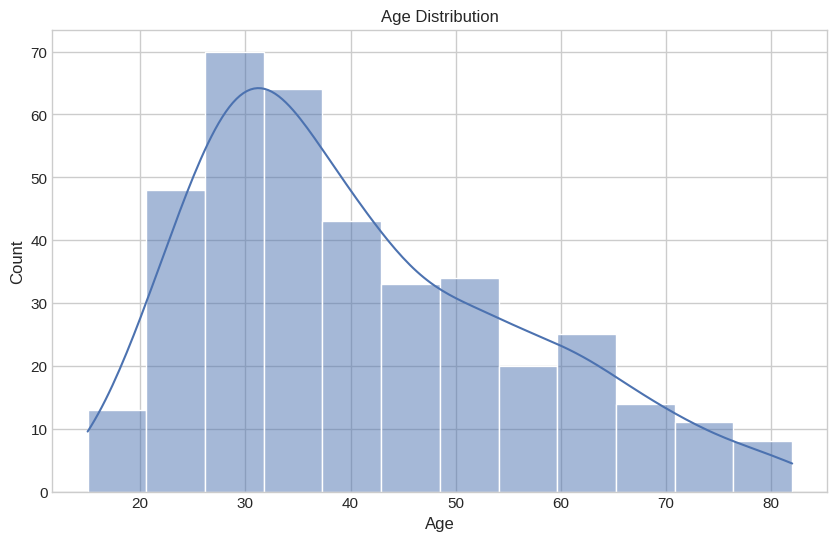

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(thyroid_data['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Gender Distribution**

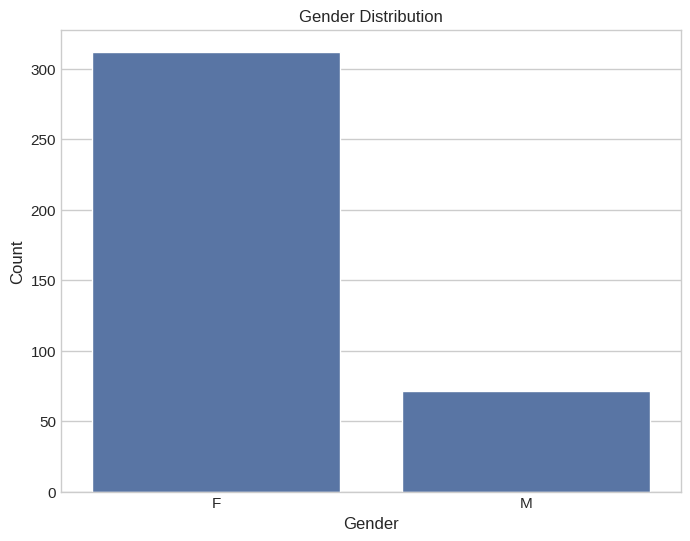

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=thyroid_data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**Pathology Distribution**

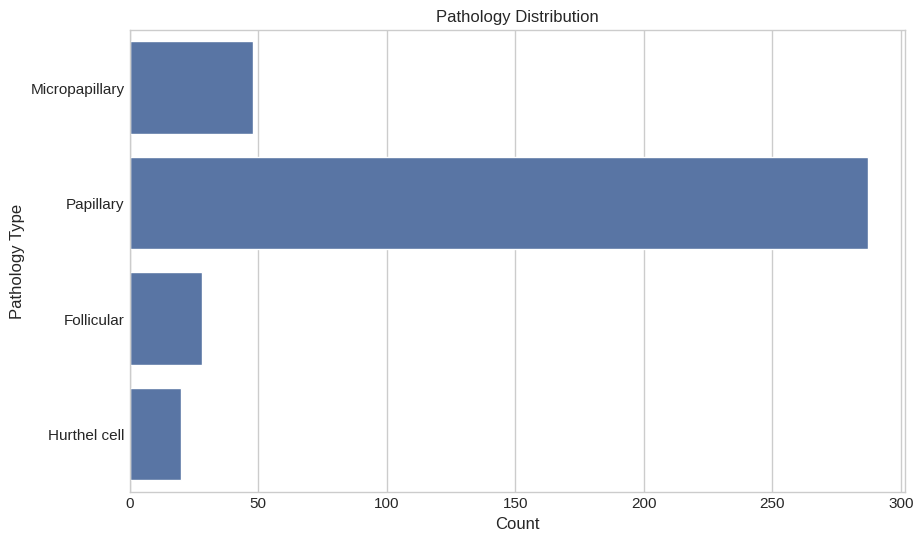

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Pathology', data=thyroid_data)
plt.title('Pathology Distribution')
plt.xlabel('Count')
plt.ylabel('Pathology Type')
plt.show()

**Risk Distribution**

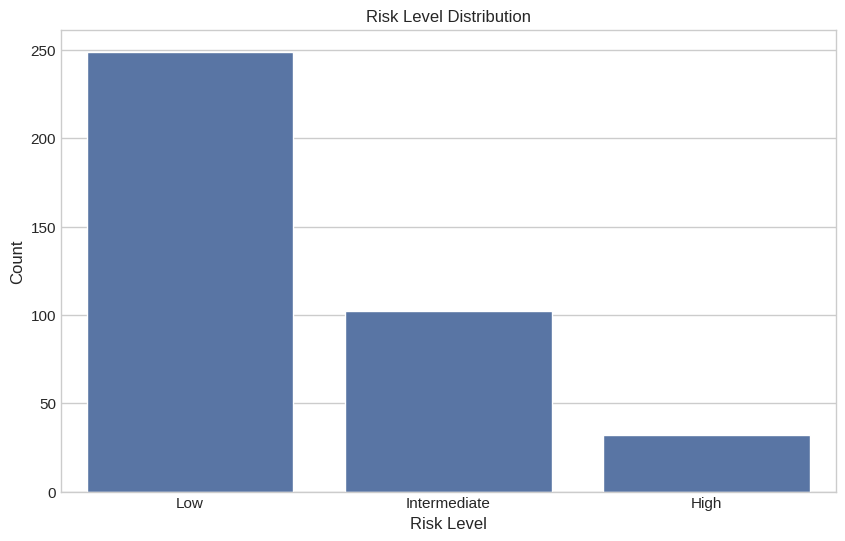

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Risk', data=thyroid_data)
plt.title('Risk Level Distribution')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()

**Recurrence Distribution**

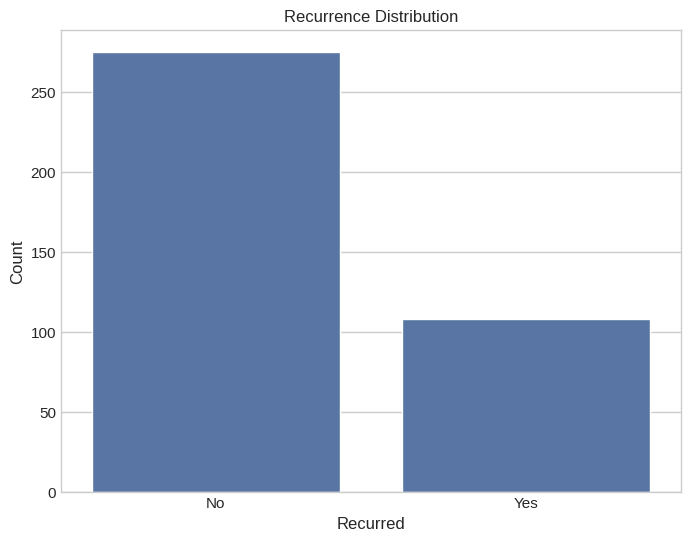

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Recurred', data=thyroid_data)
plt.title('Recurrence Distribution')
plt.xlabel('Recurred')
plt.ylabel('Count')
plt.show()

**Smoking Distribution**

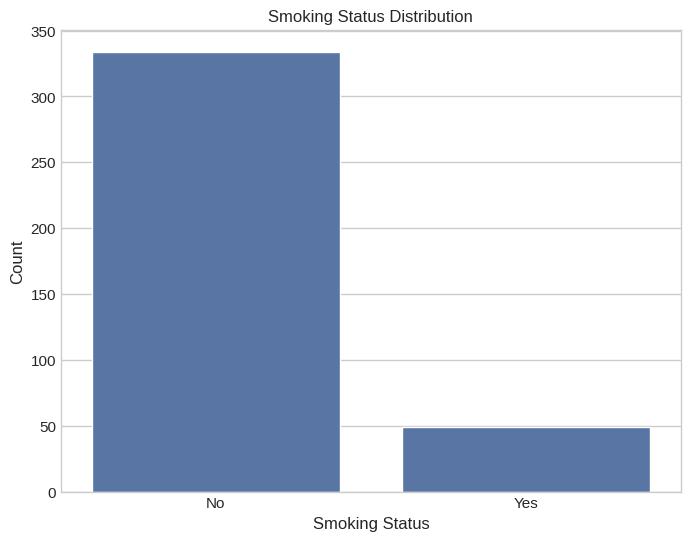

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Smoking', data=thyroid_data)
plt.title('Smoking Status Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

**History of Smoking Distribution**

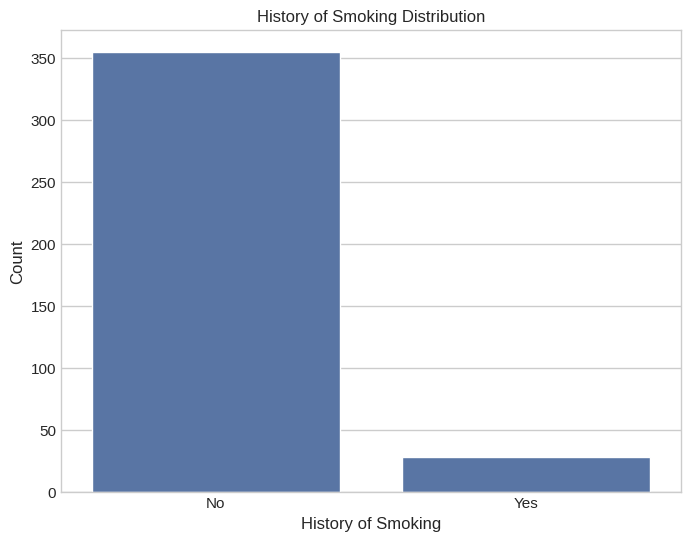

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Hx Smoking', data=thyroid_data)
plt.title('History of Smoking Distribution')
plt.xlabel('History of Smoking')
plt.ylabel('Count')
plt.show()

**History of Radiotherapy**

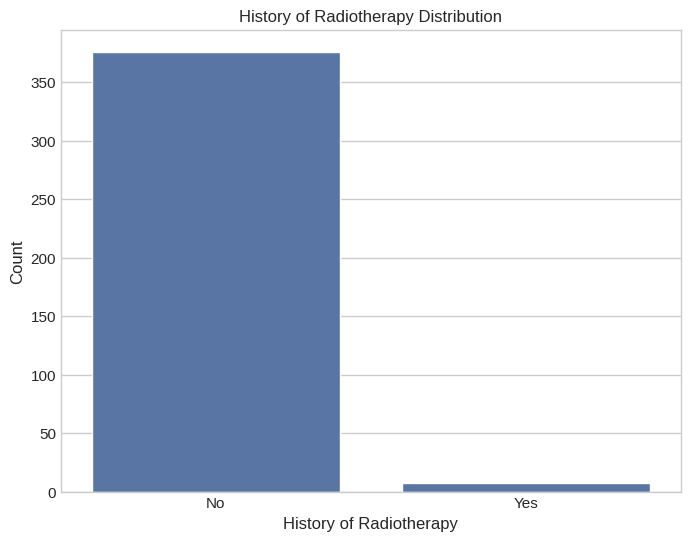

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Hx Radiotherapy', data=thyroid_data)
plt.title('History of Radiotherapy Distribution')
plt.xlabel('History of Radiotherapy')
plt.ylabel('Count')
plt.show()

**Thyroid Function Distribution**

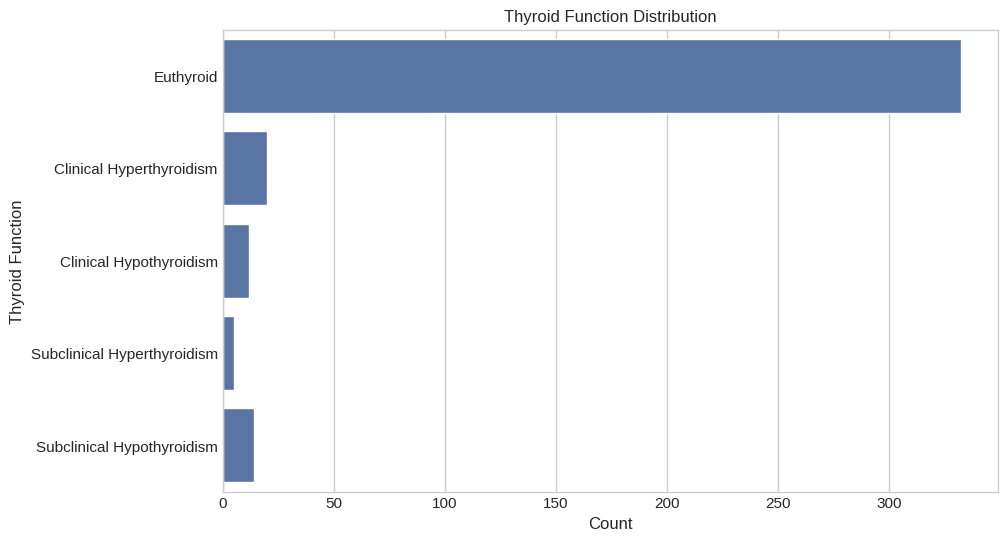

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Thyroid Function', data=thyroid_data)
plt.title('Thyroid Function Distribution')
plt.xlabel('Count')
plt.ylabel('Thyroid Function')
plt.show()

**Physical Examination Distribution**

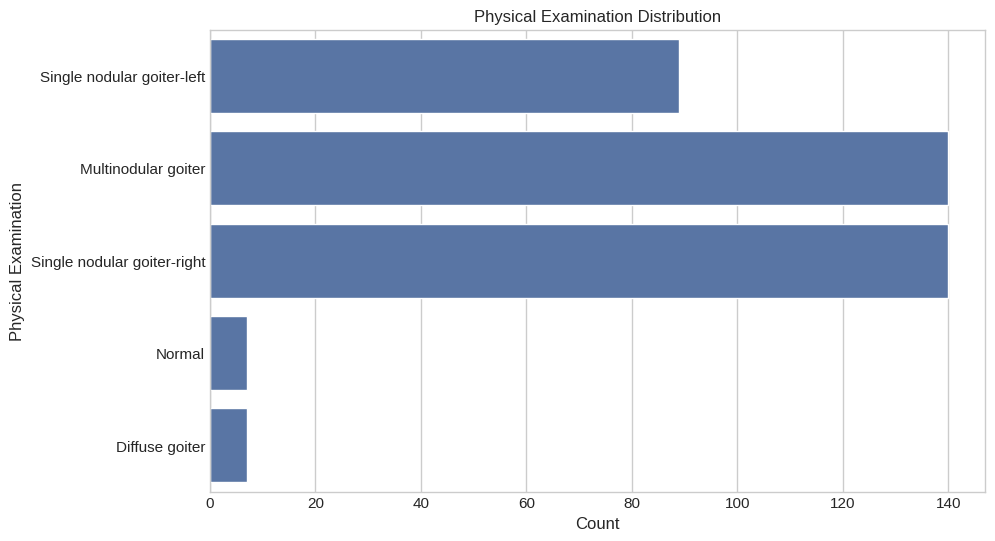

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Physical Examination', data=thyroid_data)
plt.title('Physical Examination Distribution')
plt.xlabel('Count')
plt.ylabel('Physical Examination')
plt.show()

**Adenopathy Distribution**

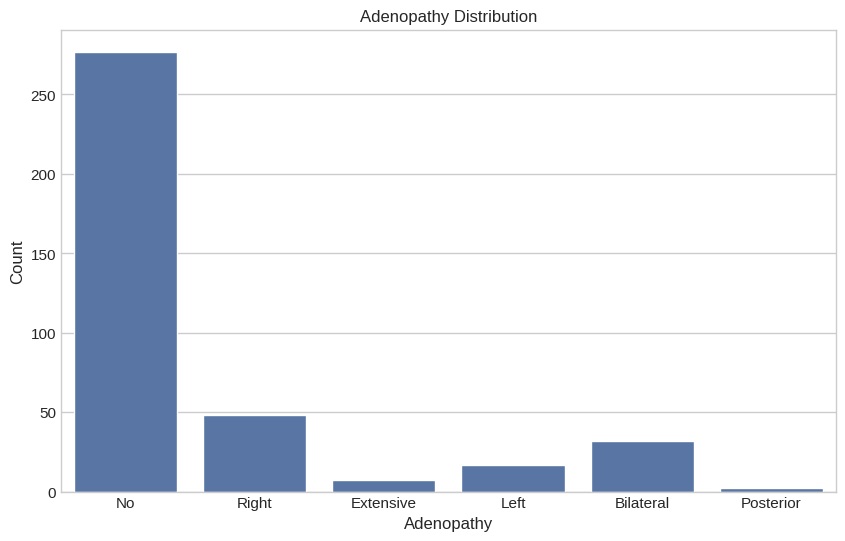

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Adenopathy', data=thyroid_data)
plt.title('Adenopathy Distribution')
plt.xlabel('Adenopathy')
plt.ylabel('Count')
plt.show()

**Focality Distribution**

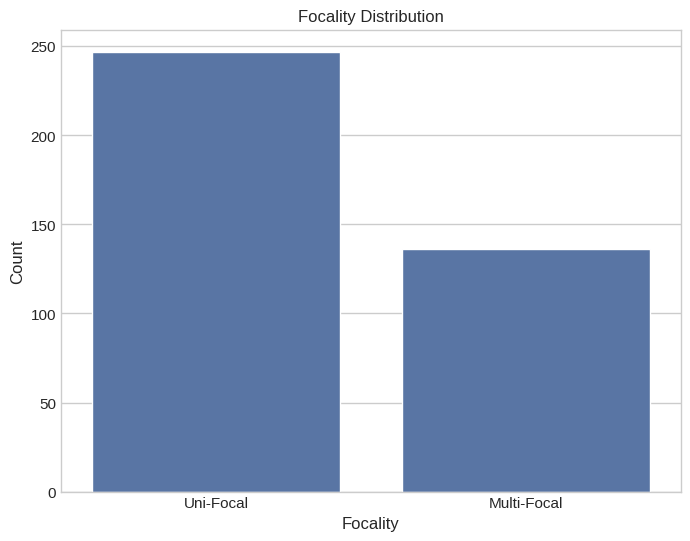

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Focality', data=thyroid_data)
plt.title('Focality Distribution')
plt.xlabel('Focality')
plt.ylabel('Count')
plt.show()

**Primary Tumor "T" Stage Distribution**

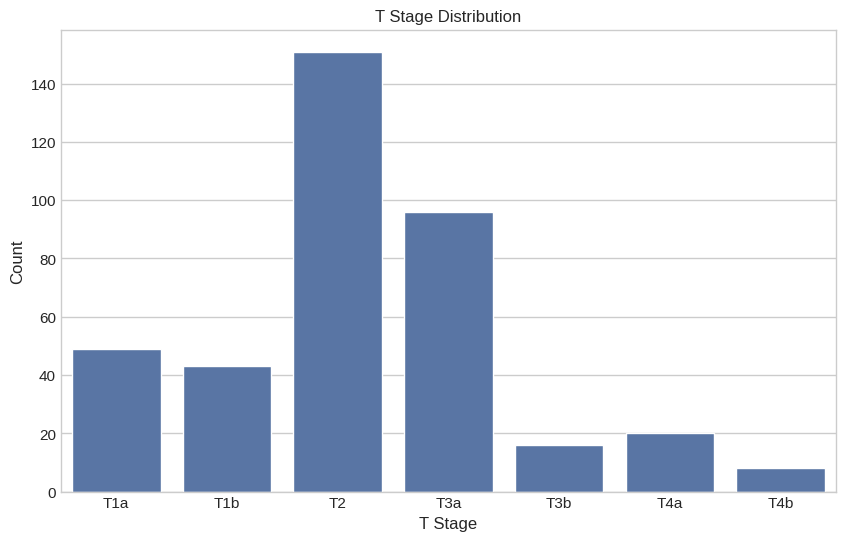

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='T', data=thyroid_data)
plt.title('T Stage Distribution')
plt.xlabel('T Stage')
plt.ylabel('Count')
plt.show()

**Regional Nymph Node "N" Stage Distribution**

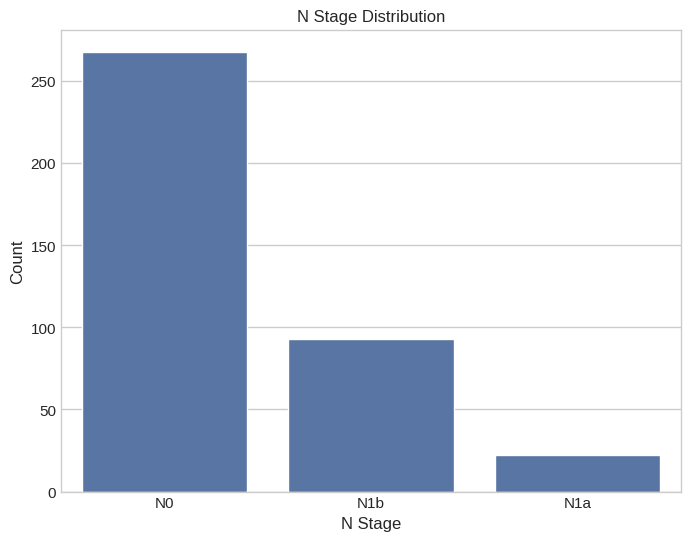

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x='N', data=thyroid_data)
plt.title('N Stage Distribution')
plt.xlabel('N Stage')
plt.ylabel('Count')
plt.show()

**Distant Metastasis "M" Stage Distribution**

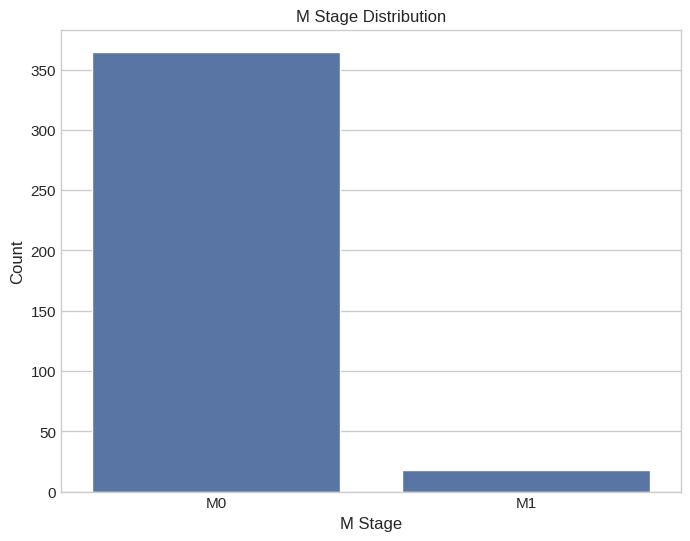

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='M', data=thyroid_data)
plt.title('M Stage Distribution')
plt.xlabel('M Stage')
plt.ylabel('Count')
plt.show()

**Cancer Stage Distribution**

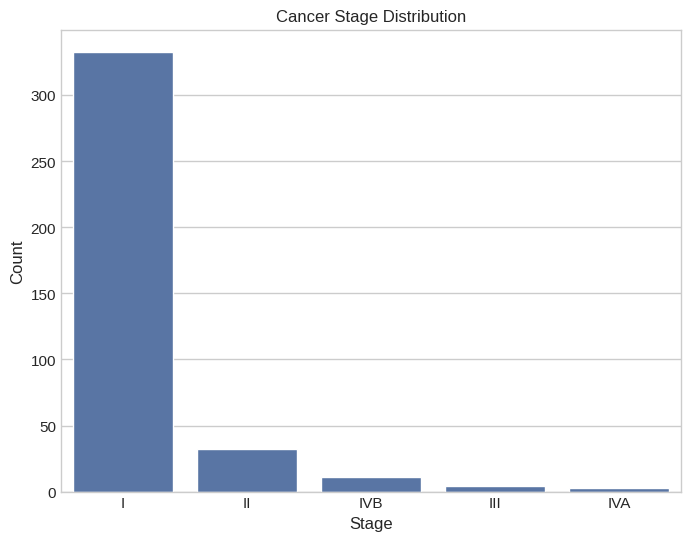

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Stage', data=thyroid_data)
plt.title('Cancer Stage Distribution')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.show()

**Response Distribution**

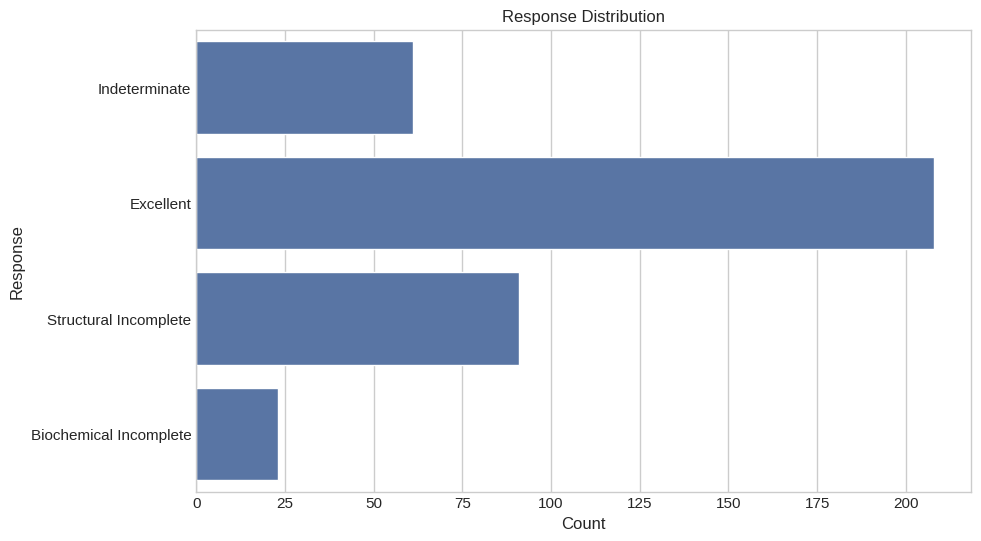

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Response', data=thyroid_data)
plt.title('Response Distribution')
plt.xlabel('Count')
plt.ylabel('Response')
plt.show()

# **Visualizing Relationship with Recurrence**

**Age - Recurrence**

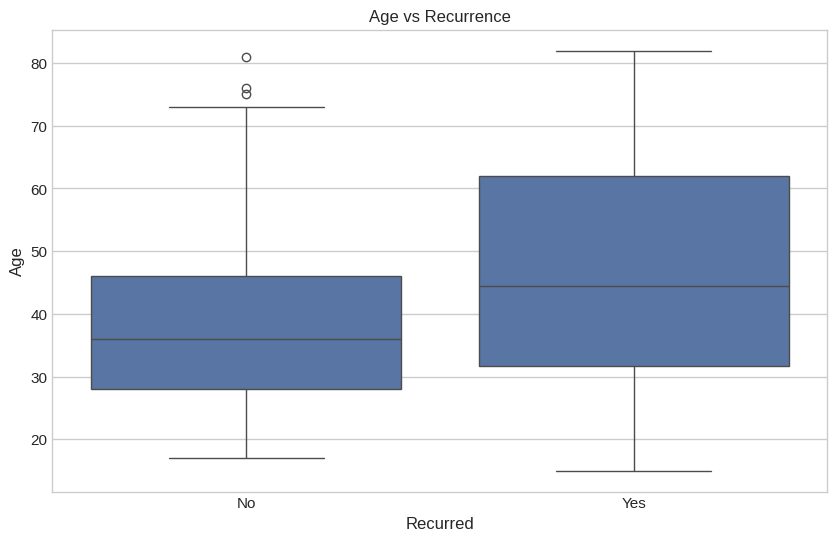

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Recurred', y='Age', data=thyroid_data)
plt.title('Age vs Recurrence')
plt.xlabel('Recurred')
plt.ylabel('Age')
plt.show()

**Gender - Recurrence**

<Figure size 1000x600 with 0 Axes>

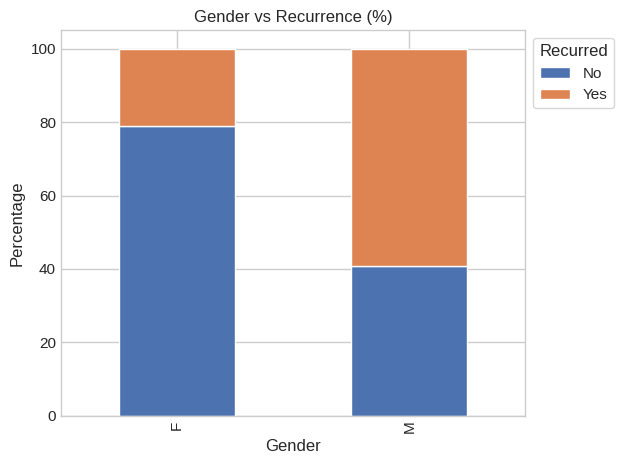

In [34]:
plt.figure(figsize=(10, 6))
recurrence_by_gender = pd.crosstab(thyroid_data['Gender'], thyroid_data['Recurred'])
recurrence_by_gender_pct = recurrence_by_gender.div(recurrence_by_gender.sum(axis=1), axis=0) * 100

recurrence_by_gender_pct.plot(kind='bar', stacked=True)
plt.title('Gender vs Recurrence (%)')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

**Smoking - Recurrence**

<Figure size 1000x600 with 0 Axes>

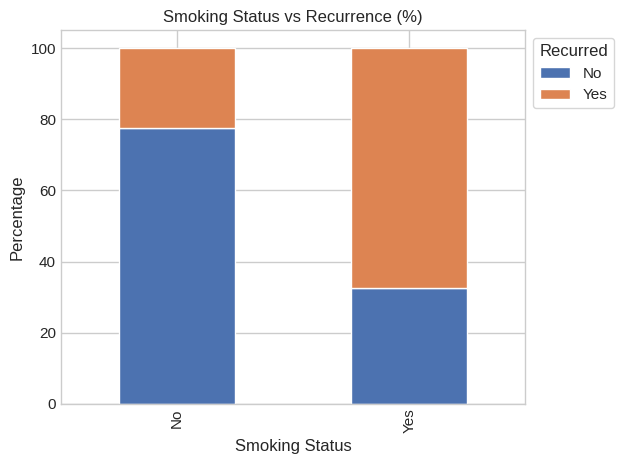

In [51]:
plt.figure(figsize=(10, 6))
recurrence_by_smoking = pd.crosstab(thyroid_data['Smoking'], thyroid_data['Recurred'])
recurrence_by_smoking_pct = recurrence_by_smoking.div(recurrence_by_smoking.sum(axis=1), axis=0) * 100

recurrence_by_smoking_pct.plot(kind='bar', stacked=True)
plt.title('Smoking Status vs Recurrence (%)')
plt.xlabel('Smoking Status')
plt.ylabel('Percentage')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

**History of Smoking - Recurrence**

<Figure size 1000x600 with 0 Axes>

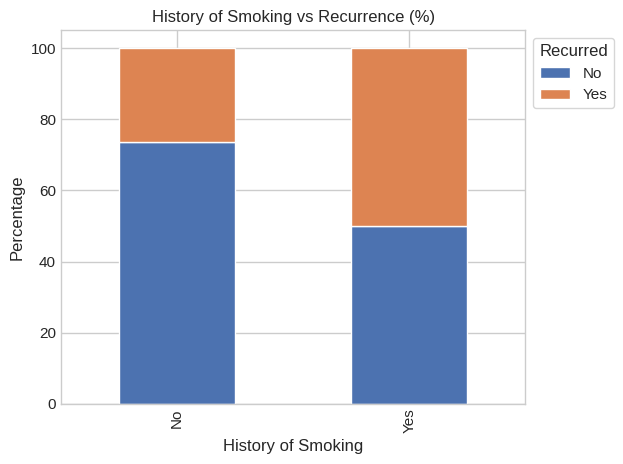

In [39]:
plt.figure(figsize=(10, 6))
recurrence_by_hx_smoking = pd.crosstab(thyroid_data['Hx Smoking'], thyroid_data['Recurred'])
recurrence_by_hx_smoking_pct = recurrence_by_hx_smoking.div(recurrence_by_hx_smoking.sum(axis=1), axis=0) * 100

recurrence_by_hx_smoking_pct.plot(kind='bar', stacked=True)
plt.title('History of Smoking vs Recurrence (%)')
plt.xlabel('History of Smoking')
plt.ylabel('Percentage')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

**History of Radiotherapy - Recurrence**

<Figure size 1000x600 with 0 Axes>

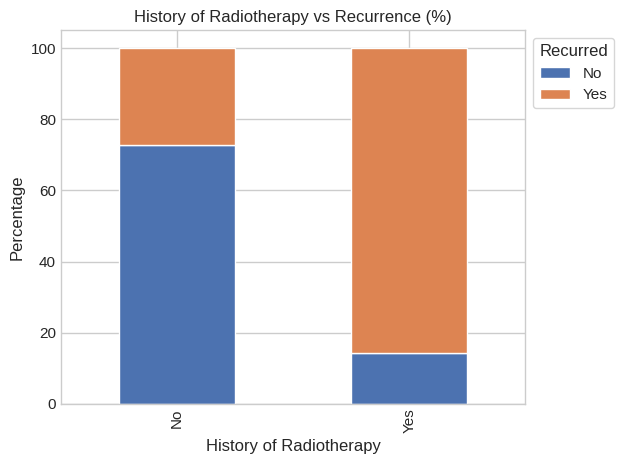

In [40]:
plt.figure(figsize=(10, 6))
recurrence_by_hx_radiotherapy = pd.crosstab(thyroid_data['Hx Radiotherapy'], thyroid_data['Recurred'])
recurrence_by_hx_radiotherapy_pct = recurrence_by_hx_radiotherapy.div(recurrence_by_hx_radiotherapy.sum(axis=1), axis=0) * 100

recurrence_by_hx_radiotherapy_pct.plot(kind='bar', stacked=True)
plt.title('History of Radiotherapy vs Recurrence (%)')
plt.xlabel('History of Radiotherapy')
plt.ylabel('Percentage')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

**Thyroid Function - Recurrence**

<Figure size 1200x600 with 0 Axes>

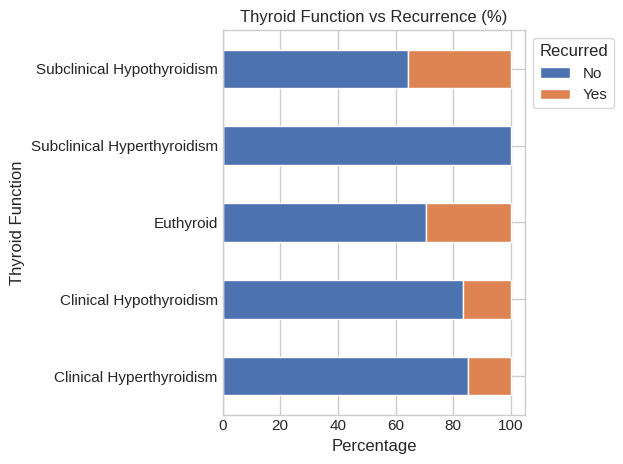

In [50]:
plt.figure(figsize=(12, 6))
recurrence_by_thyroid_function = pd.crosstab(thyroid_data['Thyroid Function'], thyroid_data['Recurred'])
recurrence_by_thyroid_function_pct = recurrence_by_thyroid_function.div(recurrence_by_thyroid_function.sum(axis=1), axis=0) * 100

recurrence_by_thyroid_function_pct.plot(kind='barh', stacked=True)
plt.title('Thyroid Function vs Recurrence (%)')
plt.xlabel('Percentage')
plt.ylabel('Thyroid Function')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

**Physical Examination - Recurrence**

<Figure size 1200x600 with 0 Axes>

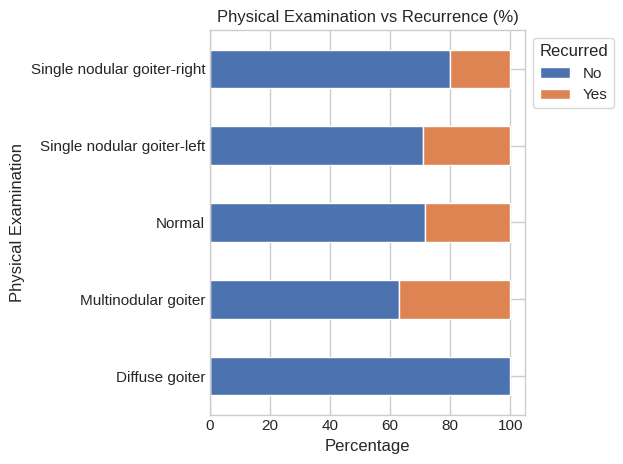

In [49]:
plt.figure(figsize=(12, 6))
recurrence_by_physical_exam = pd.crosstab(thyroid_data['Physical Examination'], thyroid_data['Recurred'])
recurrence_by_physical_exam_pct = recurrence_by_physical_exam.div(recurrence_by_physical_exam.sum(axis=1), axis=0) * 100

recurrence_by_physical_exam_pct.plot(kind='barh', stacked=True)
plt.title('Physical Examination vs Recurrence (%)')
plt.xlabel('Percentage')
plt.ylabel('Physical Examination')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

**Adenopathy - Recurrence**

<Figure size 1000x600 with 0 Axes>

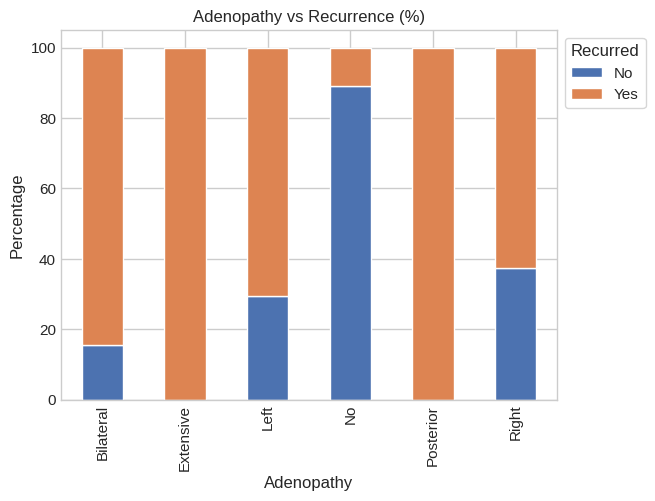

In [32]:
plt.figure(figsize=(10, 6))
recurrence_by_adenopathy = pd.crosstab(thyroid_data['Adenopathy'], thyroid_data['Recurred'])
recurrence_by_adenopathy_pct = recurrence_by_adenopathy.div(recurrence_by_adenopathy.sum(axis=1), axis=0) * 100

recurrence_by_adenopathy_pct.plot(kind='bar', stacked=True)
plt.title('Adenopathy vs Recurrence (%)')
plt.xlabel('Adenopathy')
plt.ylabel('Percentage')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.show()

**Pathology - Recurrence**

<Figure size 1200x600 with 0 Axes>

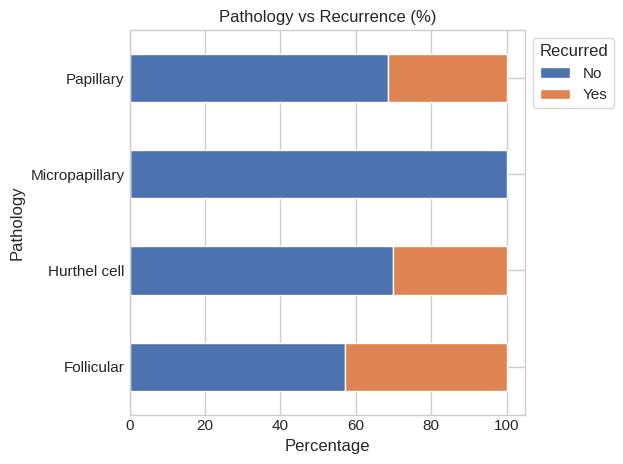

In [48]:
plt.figure(figsize=(12, 6))
recurrence_by_pathology = pd.crosstab(thyroid_data['Pathology'], thyroid_data['Recurred'])
recurrence_by_pathology_pct = recurrence_by_pathology.div(recurrence_by_pathology.sum(axis=1), axis=0) * 100

recurrence_by_pathology_pct.plot(kind='barh', stacked=True)
plt.title('Pathology vs Recurrence (%)')
plt.xlabel('Percentage')
plt.ylabel('Pathology')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

**Focality - Recurrence**

<Figure size 1000x600 with 0 Axes>

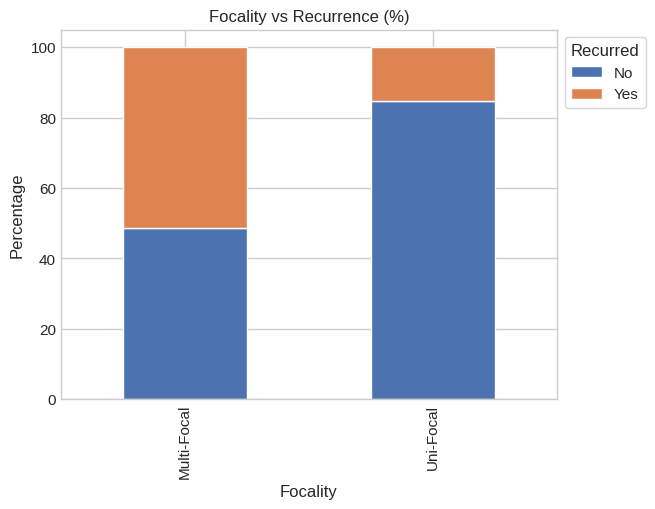

In [33]:
plt.figure(figsize=(10, 6))
recurrence_by_focality = pd.crosstab(thyroid_data['Focality'], thyroid_data['Recurred'])
recurrence_by_focality_pct = recurrence_by_focality.div(recurrence_by_focality.sum(axis=1), axis=0) * 100

recurrence_by_focality_pct.plot(kind='bar', stacked=True)
plt.title('Focality vs Recurrence (%)')
plt.xlabel('Focality')
plt.ylabel('Percentage')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.show()

**Risk Level - Recurrence**

<Figure size 1200x600 with 0 Axes>

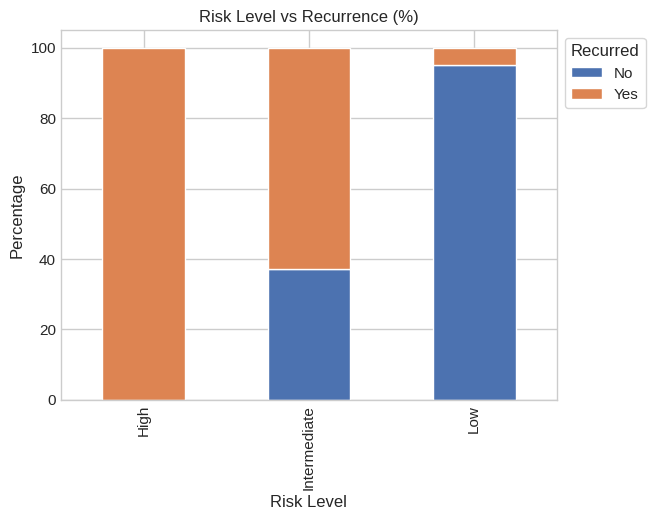

In [26]:
plt.figure(figsize=(12, 6))
recurrence_by_risk = pd.crosstab(thyroid_data['Risk'], thyroid_data['Recurred'])
recurrence_by_risk_pct = recurrence_by_risk.div(recurrence_by_risk.sum(axis=1), axis=0) * 100

recurrence_by_risk_pct.plot(kind='bar', stacked=True)
plt.title('Risk Level vs Recurrence (%)')
plt.xlabel('Risk Level')
plt.ylabel('Percentage')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.show()

**T Stage - Recurrence**

<Figure size 1200x600 with 0 Axes>

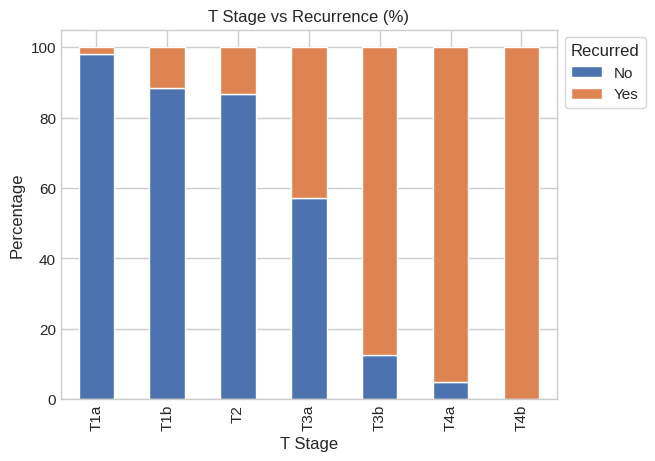

In [28]:
plt.figure(figsize=(12, 6))
recurrence_by_t = pd.crosstab(thyroid_data['T'], thyroid_data['Recurred'])
recurrence_by_t_pct = recurrence_by_t.div(recurrence_by_t.sum(axis=1), axis=0) * 100

recurrence_by_t_pct.plot(kind='bar', stacked=True)
plt.title('T Stage vs Recurrence (%)')
plt.xlabel('T Stage')
plt.ylabel('Percentage')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.show()

**N Stage - Recurrence**

<Figure size 1000x600 with 0 Axes>

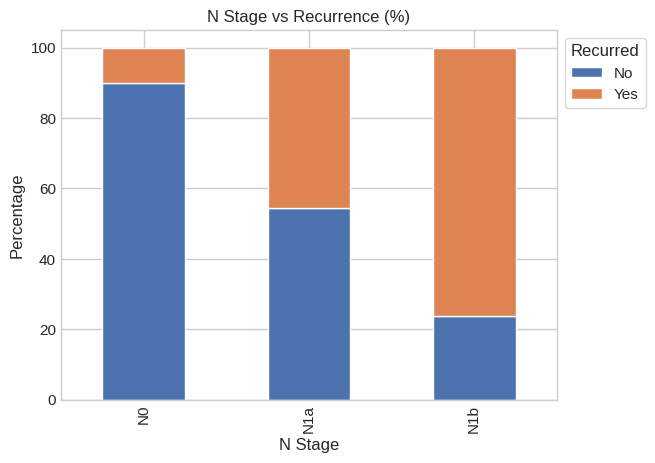

In [29]:
plt.figure(figsize=(10, 6))
recurrence_by_n = pd.crosstab(thyroid_data['N'], thyroid_data['Recurred'])
recurrence_by_n_pct = recurrence_by_n.div(recurrence_by_n.sum(axis=1), axis=0) * 100

recurrence_by_n_pct.plot(kind='bar', stacked=True)
plt.title('N Stage vs Recurrence (%)')
plt.xlabel('N Stage')
plt.ylabel('Percentage')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.show()

**M-Stage - Recurrence**

<Figure size 1000x600 with 0 Axes>

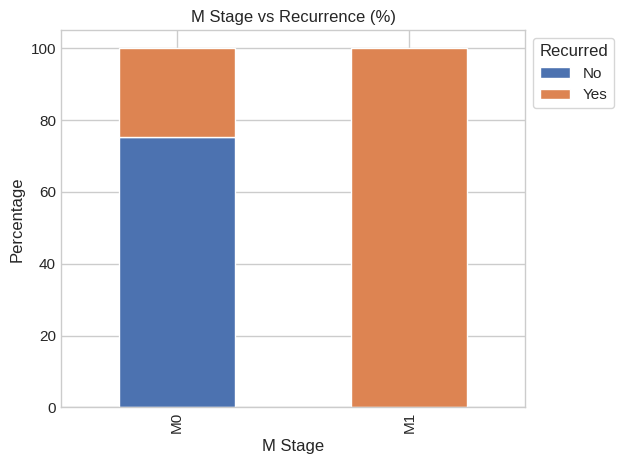

In [31]:
plt.figure(figsize=(10, 6))
recurrence_by_m = pd.crosstab(thyroid_data['M'], thyroid_data['Recurred'])
recurrence_by_m_pct = recurrence_by_m.div(recurrence_by_m.sum(axis=1), axis=0) * 100

recurrence_by_m_pct.plot(kind='bar', stacked=True)
plt.title('M Stage vs Recurrence (%)')
plt.xlabel('M Stage')
plt.ylabel('Percentage')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

**Stage - Recurrence**

<Figure size 1000x600 with 0 Axes>

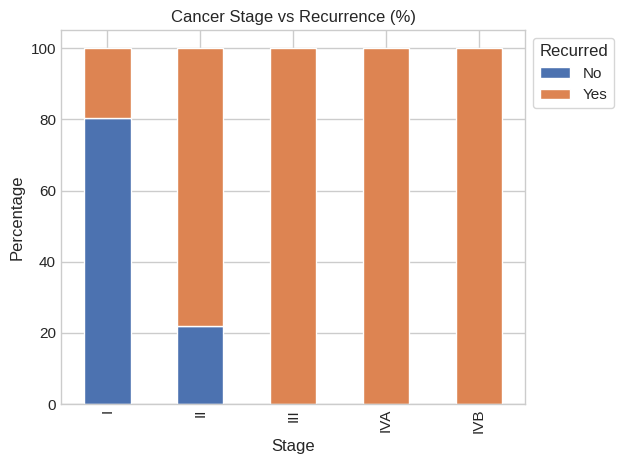

In [47]:
plt.figure(figsize=(10, 6))
recurrence_by_stage = pd.crosstab(thyroid_data['Stage'], thyroid_data['Recurred'])
recurrence_by_stage_pct = recurrence_by_stage.div(recurrence_by_stage.sum(axis=1), axis=0) * 100

recurrence_by_stage_pct.plot(kind='bar', stacked=True)
plt.title('Cancer Stage vs Recurrence (%)')
plt.xlabel('Stage')
plt.ylabel('Percentage')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

**Response - Recurrence**

<Figure size 1200x600 with 0 Axes>

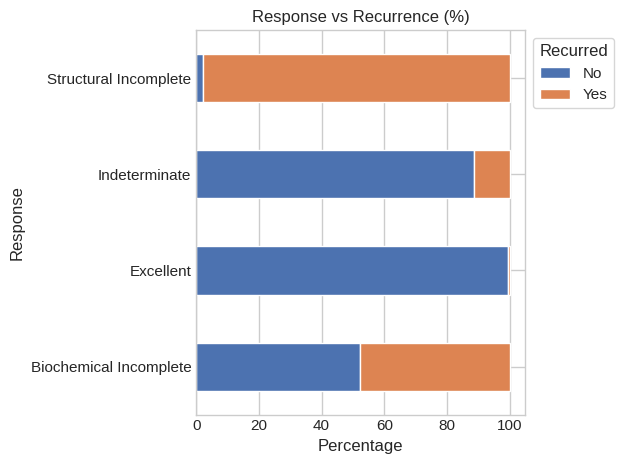

In [46]:
plt.figure(figsize=(12, 6))
recurrence_by_response = pd.crosstab(thyroid_data['Response'], thyroid_data['Recurred'])
recurrence_by_response_pct = recurrence_by_response.div(recurrence_by_response.sum(axis=1), axis=0) * 100

recurrence_by_response_pct.plot(kind='barh', stacked=True)
plt.title('Response vs Recurrence (%)')
plt.xlabel('Percentage')
plt.ylabel('Response')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

Female patients seem to have a lower recurrence rate compared to males. While  majority of the females don't experience recurrence, the recurrence rate among males is notably higher. This suggests that males may be an independent risk factor for recurrence.

Patients that have a history of radiotherapy show a substantially higher recurrence rate. This is significant as it highlights the fact that a history of radiotherapy is a strong predictor of recurrence, possibly due to some treatment-resistant characteristics in these patients. We must keep in mind the proportion of patients that have a history of radiotherapy is quite low so we can't simply jump to conclusions yet.

Having a history of smoking can be seen to be associated with a higher recurrence rate. Patients who have a history of smoking are more likely to experience recurrence compared to those who don't. Current smokers also have a much higher recurrence rate compared to non-smokers. This supports the hypothesis that smoking may contribute to diseases or impair the ability to respond to treatment. It further emphasizes the negative impact of tobacco use on thyroid cancer outcomes. It is a risk factor worth addressing as it can be altered as a precautionary step with patient education and consultation.

Looking at the TNM-Staging, we can see the most dramatic change in the M stage (Metastasis) analysis as having been catagorized in M1, meaning the cancer has spread to another part of the body, almost universally indicates recurrence. This finding underscores just how important this factor is and calls for a need of strong surveillence of the cancer. As for the T stage (Tumor), something noteworthy is how in the earlier stages, there is a low recurrence rate, however, at the more advanced T stages, the recurrence rate gets progressively higher and higher. This indicates that the tumor size is yet another key factor to keep in mind when assessing the risk for recurrence.

Looking into the different pathological subtypes of thyroid cancer we see that Papillary and Hürthle Cell carcinomas have a moderate recurrence rates while micropapillary carcinoma shows nearly no recurrence. Follicular carcinoma, however, has the highest recurrence rate than than the rest. These findings suggest that the thyroid cancer subtype should be keeped in consideration when performing risk assessment.

As an summary of all the features, we can see that advanced T, N, and M stages, classification of high risk, and poor response to initial therapy are strongly associated with recurrence. Being a Male and a smoker (both current and in the past) are also linked to higher recurrence. Having certain kinds of pathological subtype, such as Follicular, is a strong indication of recurrence.

# **Feature Correlation Matrix**

**Prepping the Data**

In [10]:
corr_data = thyroid_data.copy()
categorical_columns = corr_data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for column in categorical_columns:
    corr_data[column] = label_encoder.fit_transform(corr_data[column].astype(str))

corr_data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiotherapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0


**Producing the Visual**

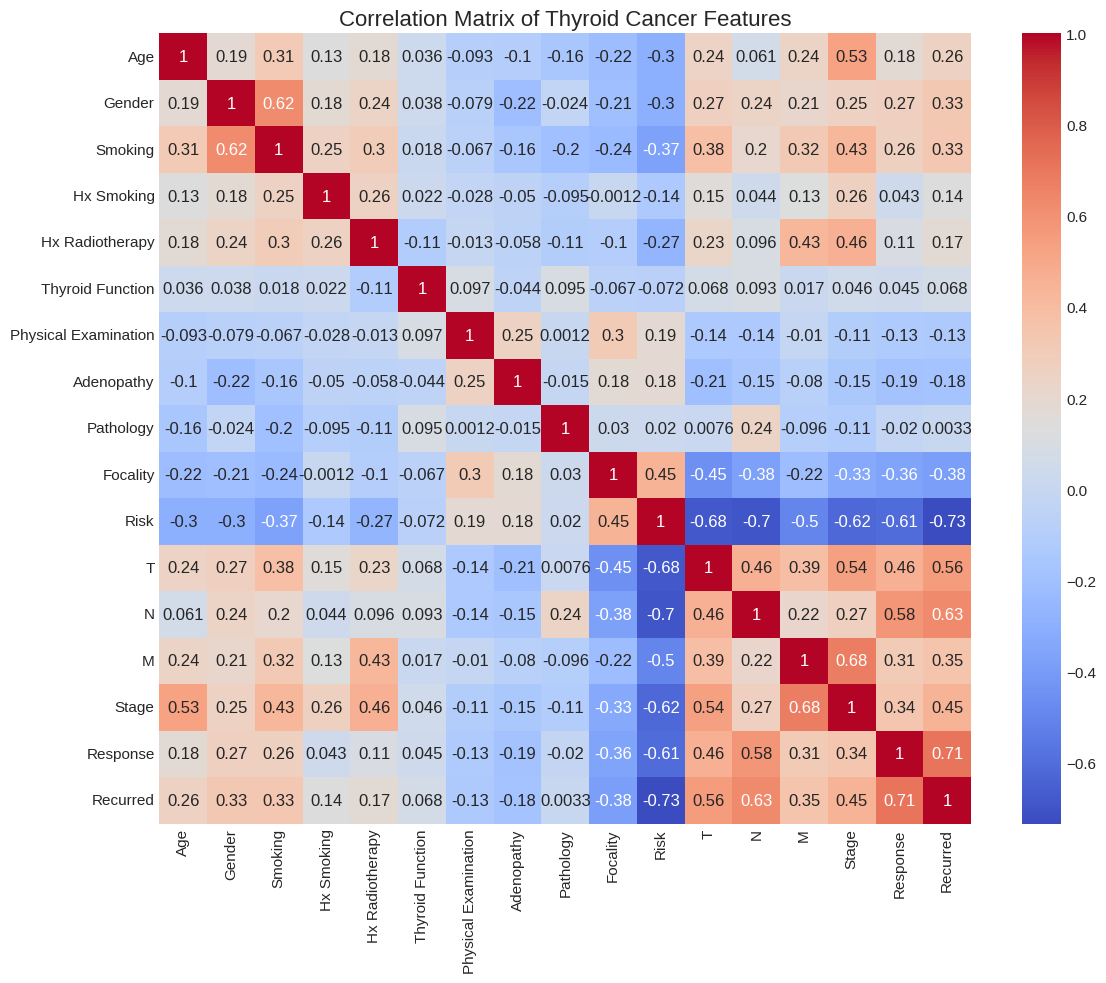

In [39]:
correlation_matrix = corr_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Thyroid Cancer Features', fontsize=16)
plt.tight_layout()
plt.show()


**Correlation Strength List**

In [32]:
recurrence_correlations = correlation_matrix['Recurred'].sort_values(key=abs, ascending=False)

print("Correlations w/ recurrence (sorted by strength):")
print(recurrence_correlations)

Correlations with recurrence (sorted by strength):
Recurred                1.000000
Risk                   -0.733376
Response                0.708957
N                       0.632323
T                       0.556201
Stage                   0.449137
Focality               -0.383776
M                       0.354360
Smoking                 0.333243
Gender                  0.328189
Age                     0.258897
Adenopathy             -0.182530
Hx Radiotherapy         0.174407
Hx Smoking              0.136073
Physical Examination   -0.131801
Thyroid Function        0.067758
Pathology               0.003272
Name: Recurred, dtype: float64


# **Statistical Analysis**

**Building T-test and Chi-Square Test Functions**

In [7]:
def perform_ttest(data, numerical_var, target_var='Recurred'):
    # Split based on recurr
    recurred = data[data[target_var] == 'Yes'][numerical_var]
    not_recurred = data[data[target_var] == 'No'][numerical_var]

    t_stat, p_value = stats.ttest_ind(recurred, not_recurred, equal_var=False)

    # Calc mean values
    mean_recurred = recurred.mean()
    mean_not_recurred = not_recurred.mean()

    return {
        'variable': numerical_var,
        't_statistic': t_stat,
        'p_value': p_value,
        'mean_recurred': mean_recurred,
        'mean_not_recurred': mean_not_recurred,
        'significant': p_value < 0.05
    }

def perform_chi2(data, categorical_var, target_var='Recurred'):
    #contingency table
    contingency_table = pd.crosstab(data[categorical_var], data[target_var])
    print(f"\nContingency Table for {categorical_var}:")
    print(contingency_table)
    print("----------------------------------------")

    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    return {
        'variable': categorical_var,
        'chi2_statistic': chi2,
        'p_value': p_value,
        'degrees_of_freedom': dof,
        'significant': p_value < 0.05
    }

**Perform & Print Test Results**

In [8]:
numerical_vars = ['Age']
categorical_vars = [col for col in thyroid_data.columns if col != 'Age' and col != 'Recurred']

#t-test
ttest_results = []
for var in numerical_vars:
    result = perform_ttest(thyroid_data, var)
    ttest_results.append(result)

ttest_df = pd.DataFrame(ttest_results)
print("T-test results for numerical variables:\n")
print(ttest_df)

print("----------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------")


#chi-square tests
chi2_results = []
for var in categorical_vars:
    result = perform_chi2(thyroid_data, var)
    chi2_results.append(result)

chi2_df = pd.DataFrame(chi2_results)
print("\nChi-square test results for categorical variables:\n")
print(chi2_df.sort_values('p_value').reset_index(drop=True))

#find significant vars
significant_vars = chi2_df[chi2_df['p_value'] < 0.05]['variable'].tolist()
if any(ttest_df['p_value'] < 0.05):
    significant_vars.extend(ttest_df[ttest_df['p_value'] < 0.05]['variable'].tolist())

print("\nStatistically significant variables (p < 0.05):\n")
print(significant_vars)

T-test results for numerical variables:

  variable  t_statistic   p_value  mean_recurred  mean_not_recurred  significant
0      Age       4.5215  0.000012      47.111111          38.414545         True
----------------------------------------------------------------------------------
----------------------------------------------------------------------------------

Contingency Table for Gender:
Recurred   No  Yes
Gender            
F         246   66
M          29   42
----------------------------------------

Contingency Table for Smoking:
Recurred   No  Yes
Smoking           
No        259   75
Yes        16   33
----------------------------------------

Contingency Table for Hx Smoking:
Recurred     No  Yes
Hx Smoking          
No          261   94
Yes          14   14
----------------------------------------

Contingency Table for Hx Radiotherapy:
Recurred          No  Yes
Hx Radiotherapy          
No               274  102
Yes                1    6
------------------------------

- The t-test assumes normality of the numerical variable. If this assumption is violated, then it won't be as accurate. Verify it with the Shapiro-Wilk test.
- The chi-square test assumes sufficiently large expected frequencies. If there is small sample sizes or rare categories, then it will be less accurate.
- don't account for confounding variables. Will probably need some kind of multivariate methods.

**Re: Age distribution**

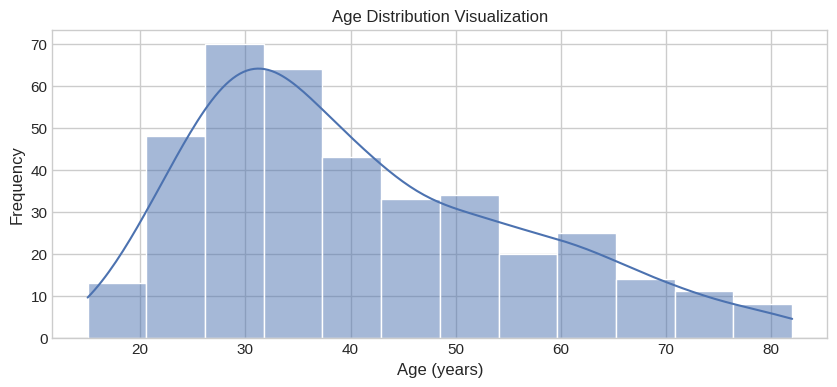

In [46]:
plt.figure(figsize=(10,4))
sns.histplot(thyroid_data['Age'], kde=True)
plt.title('Age Distribution Visualization')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

Right-skewed distribution

**Q-Q Plot for Age Distribution**

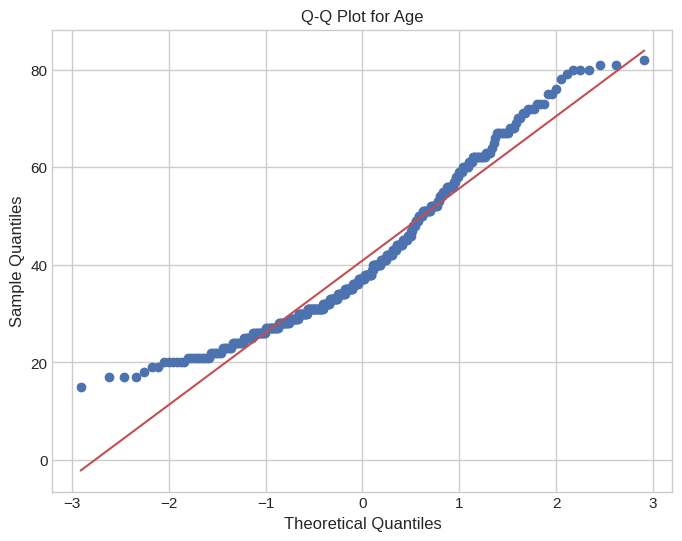

In [9]:
plt.figure(figsize=(8, 6))
stats.probplot(thyroid_data['Age'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Age')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

Notice that the points don't fall on the line and deviates a lot. This is indication of non-normality.

**Shapiro-Wilk Test on Age**

In [9]:
shapiro_stat, shapiro_p = stats.shapiro(thyroid_data['Age'])
print(f"Shapiro-Wilk Test for Age:\nStatistic: {shapiro_stat:.4f}, p-value: {shapiro_p:.4f}")

alpha = 0.05
if shapiro_p > alpha:
    print("\nAge appears normally distributed (p > 0.05) - t-test is fine")
else:
    print("\nAge does NOT follow normal distribution (p < 0.05) - Use Mann-Whitney U test")

Shapiro-Wilk Test for Age:
Statistic: 0.9422, p-value: 0.0000

Age does NOT follow normal distribution (p < 0.05) - Use Mann-Whitney U test


From both the graphs and the Shapiro-Wilk test, we concluded that the distribution of age is not normal and so a non-parametric test—the Mann-Whitney U test—would be more appropriate for it.

**Mann-Whitney U Test for Age**

In [15]:
recurred_age = thyroid_data[thyroid_data['Recurred'] == 'Yes']['Age']
not_recurred_age = thyroid_data[thyroid_data['Recurred'] == 'No']['Age']

u_stat, p_value = stats.mannwhitneyu(recurred_age, not_recurred_age, alternative='two-sided')
print(f"Mann-Whitney U Test Results:\nU-statistic: {u_stat}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant difference in Age between recurred and not recurred groups.")
else:
    print("No significant difference in Age between recurred and not recurred groups.")

Mann-Whitney U Test Results:
U-statistic: 18880.0, p-value: 0.0000
Significant difference in Age between recurred and not recurred groups.


We can conclude that "Age" is a statistically significant feature in terms of the recurrence. The difference in age between the the two groups (recurred and not recurred) is unlikely to be due to random chance.

Looking back at the contingency tables, we can see that there are a few variables that violate the assumptions of the Chi-Square test: Hx Radiotherapy, Thyroid Function, Physical Examination, Adenopathy, Stage, and Pathology. The Chi-Square test expects all cells to have at least 5 count, and the ones listed all don't meet that assumption. Therefore, we must turn to the Fisher's Exact test and the Fisher-Freeman-Halton Exact test for these variables. I will also be collapsing some rarer categories to ensure test validity. Fisher's Exact test is to be used for 2 by 2 tables so in this case, it will only be Hx Radiotherapy. Fisher-Freeman-Halton Exact test is for larger tables with more catagories. Both of these test are appropriate for small cell counts and still provide valid statistical results.

**Collapse Variables**

In [11]:
# Collapse categories for Stage
thyroid_data['Stage'] = thyroid_data['Stage'].replace({
    'IVA': 'Advanced Stage IV',
    'IVB': 'Advanced Stage IV'
})

# Collapse categories for Thyroid Function
thyroid_data['Thyroid Function'] = thyroid_data['Thyroid Function'].replace({
    'Clinical Hyperthyroidism': 'Any Hyperthyroidism',
    'Subclinical Hyperthyroidism': 'Any Hyperthyroidism',
    'Clinical Hypothyroidism': 'Any Hypothyroidism',
    'Subclinical Hypothyroidism': 'Any Hypothyroidism'
})

**Fisher's Exact Test for Hx Radiotherapy**

In [12]:
contingency_table_radiotherapy = pd.crosstab(thyroid_data['Hx Radiotherapy'], thyroid_data['Recurred'])

odds_ratio, p_value_radiotherapy = fisher_exact(contingency_table_radiotherapy)
print(f"Fisher's Exact Test for Hx Radiotherapy:\nOdds Ratio: {odds_ratio:.4f}, p-value: {p_value_radiotherapy:.4f}")

Fisher's Exact Test for Hx Radiotherapy:
Odds Ratio: 16.1176, p-value: 0.0024


**Fisher-Freeman-Halton Exact Test for the Other Variables**

In [13]:
contingency_table_thyroid_function = pd.crosstab(thyroid_data['Thyroid Function'], thyroid_data['Recurred'])

table_thyroid_function = Table(contingency_table_thyroid_function.values)
result_thyroid_function = table_thyroid_function.test_nominal_association()
print(f"Fisher-Freeman-Halton Exact Test for Thyroid Function:\np-value: {result_thyroid_function.pvalue:.4f}")

print("-----------------------------------------------------")

contingency_table_physical_examination = pd.crosstab(thyroid_data['Physical Examination'], thyroid_data['Recurred'])

table_physical_examination = Table(contingency_table_physical_examination.values)
result_physical_examination = table_physical_examination.test_nominal_association()
print(f"Fisher-Freeman-Halton Exact Test for Physical Examination:\np-value: {result_physical_examination.pvalue:.4f}")

print("-----------------------------------------------------")

contingency_table_adenopathy = pd.crosstab(thyroid_data['Adenopathy'], thyroid_data['Recurred'])

table_adenopathy = Table(contingency_table_adenopathy.values)
result_adenopathy = table_adenopathy.test_nominal_association()
print(f"Fisher-Freeman-Halton Exact Test for Adenopathy:\np-value: {result_adenopathy.pvalue:.4f}")

print("-----------------------------------------------------")

contingency_table_stage = pd.crosstab(thyroid_data['Stage'], thyroid_data['Recurred'])

table_stage = Table(contingency_table_stage.values)
result_stage = table_stage.test_nominal_association()
print(f"Fisher-Freeman-Halton Exact Test for Stage:\np-value: {result_stage.pvalue:.4f}")

print("-----------------------------------------------------")

contingency_table_pathology = pd.crosstab(thyroid_data['Pathology'], thyroid_data['Recurred'])

table_pathology = Table(contingency_table_pathology.values)
result_pathology = table_pathology.test_nominal_association()
print(f"Fisher-Freeman-Halton Exact Test for Pathology:\np-value: {result_pathology.pvalue:.4f}")

Fisher-Freeman-Halton Exact Test for Thyroid Function:
p-value: 0.1698
-----------------------------------------------------
Fisher-Freeman-Halton Exact Test for Physical Examination:
p-value: 0.0180
-----------------------------------------------------
Fisher-Freeman-Halton Exact Test for Adenopathy:
p-value: 0.0000
-----------------------------------------------------
Fisher-Freeman-Halton Exact Test for Stage:
p-value: 0.0000
-----------------------------------------------------
Fisher-Freeman-Halton Exact Test for Pathology:
p-value: 0.0001


For both the tests, I compared the p-value to an alpha of 0.05. Being less that the alpha would mean that there is statistical significance on the association beteen the feature and recurrence. Being above would mean the opposite.

- Significant Associations : Hx Radiotherapy, Physical Examination, Adenopathy, Stage, and Pathology
- Non-Significant Association : Thyroid Function
---
Final Statistically significant variables :
'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiotherapy', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Age'

# **Feature Selection**

Tree-based (AdaBoost)
LASSO (L1 regularization)

**AdaBoost Implementation**

In [46]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

x = thyroid_data.drop(columns=['Recurred'])
y = thyroid_data['Recurred']

x_encoded = pd.get_dummies(x, drop_first=True)

# default is stumps, combined 50
ada_model = AdaBoostClassifier(n_estimators=50)

ada_model.fit(x_encoded, y)

feature_importances = ada_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x_encoded.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df[feature_importance_df['Importance'] != 0]
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("AdaBoost Feature Importances:\n", feature_importance_df)

AdaBoost Feature Importances:
                                              Feature  Importance
0                                                Age    0.298739
34                                Response_Excellent    0.141063
36                    Response_Structural Incomplete    0.135196
16                            Pathology_Hurthel cell    0.075551
21                                          Risk_Low    0.072620
35                            Response_Indeterminate    0.062838
1                                           Gender_M    0.036597
6                         Thyroid Function_Euthyroid    0.034650
22                                             T_T1b    0.026905
31                                           Stage_I    0.020313
17                          Pathology_Micropapillary    0.018352
29                                             N_N1b    0.015038
23                                              T_T2    0.014431
10  Physical Examination_Single nodular goiter-right    0.0

**LASSO Implementation**

In [45]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LassoCV
le = LabelEncoder()

x = thyroid_data.drop(columns=['Recurred'])
y = thyroid_data['Recurred']

for column in x.select_dtypes(include=['object']).columns:
    x[column] = le.fit_transform(x[column])

y = le.fit_transform(y)

lasso_model = LassoCV(cv=5)
lasso_model.fit(x, y)

lasso_coefficients = lasso_model.coef_
lasso_feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Coefficient': lasso_coefficients})

lasso_feature_importance_df = lasso_feature_importance_df[lasso_feature_importance_df['Coefficient'] != 0]
lasso_feature_importance_df = lasso_feature_importance_df.reindex(lasso_feature_importance_df['Coefficient'].abs().sort_values(ascending=False).index)
print("LASSO Feature Importances:\n", lasso_feature_importance_df)

LASSO Feature Importances:
                  Feature  Coefficient
10                  Risk    -0.229791
15              Response     0.180938
12                     N     0.068936
1                 Gender     0.061333
3             Hx Smoking     0.040152
5       Thyroid Function     0.038578
11                     T     0.021519
14                 Stage     0.005097
0                    Age     0.001734
6   Physical Examination     0.001356
8              Pathology    -0.000008


The results for both feature selection model differ and that stems from how the models work. AdaBoost is a whole group of decision trees and they measure importance by training each tree on a small subset of the data and each later tree is based on the improves upon the errors of the previous tree. LASSO is a linear regression model that uses the mathematical principle of L1 regularization. What that does is reduces less important features, sometimes to near zero, in order to find the best features that doesn't overfit. We can also see that the outputs are different. AdaBoost give more specific categories whilst LASSO gives the more broad feature. AdaBoost also ranks based on importance whilst LASSO gives the coefficient where the absolute value of that coefficient is attributed to its strength.

---
Commonalities:
Age, Response, Pathology, Risk, Gender, Tyroid Function, T, Stage, N, Physical Examination

Difference:
Adenopathy

# **Predictive Model Comparative Analysis**

Comparative Analysis of Logistic Regression, Random Forest, Gradient Boost (XGBoost), K-Means (KNN).